# Lab | Customer Analysis Round 3

For this lab, we still keep using the `marketing_customer_analysis.csv` file. You can find the file in the `files_for_lab` folder.

### Get the data

- Use the same jupyter file from the last lab, `Customer Analysis Round 3`

### EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:




In [39]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

In [40]:
data = pd.read_csv('marketing_customer_analysis.csv')

In [41]:
data = data.rename(columns={'Customer':'Customer ID',
                         'EmploymentStatus': 'Employment Status'})

data

,Unnamed: 0,Customer ID,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,Employment Status,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [42]:
data.dropna()

,Unnamed: 0,Customer ID,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,Employment Status,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
10,10,HG93801,Arizona,5154.764074,No,Extended,High School or Below,1/2/11,Employed,M,...,0.0,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A
13,13,KR82385,California,5454.587929,No,Basic,Master,1/26/11,Employed,M,...,0.0,4,Personal Auto,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A
16,16,FH51383,California,5326.677654,No,Basic,High School or Below,2/7/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,10902,PP30874,California,3579.023825,No,Extended,High School or Below,1/24/11,Employed,F,...,2.0,1,Personal Auto,Personal L2,Offer2,Agent,655.200000,Four-Door Car,Medsize,A
10903,10903,SU71163,Arizona,2771.663013,No,Basic,College,1/7/11,Employed,M,...,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A
10904,10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2/24/11,Unemployed,M,...,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A


In [43]:
data

,Unnamed: 0,Customer ID,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,Employment Status,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


## 1. Show DataFrame info.


In [44]:
data.head()

,Unnamed: 0,Customer ID,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,Employment Status,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


## 2. Describe DataFrame.


In [45]:
data.describe().T 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10910 non-null  int64  
 1   Customer ID                    10910 non-null  object 
 2   State                          10279 non-null  object 
 3   Customer Lifetime Value        10910 non-null  float64
 4   Response                       10279 non-null  object 
 5   Coverage                       10910 non-null  object 
 6   Education                      10910 non-null  object 
 7   Effective To Date              10910 non-null  object 
 8   Employment Status              10910 non-null  object 
 9   Gender                         10910 non-null  object 
 10  Income                         10910 non-null  int64  
 11  Location Code                  10910 non-null  object 
 12  Marital Status                 10910 non-null 

## 3. How a plot of the total number of responses.


<AxesSubplot:>

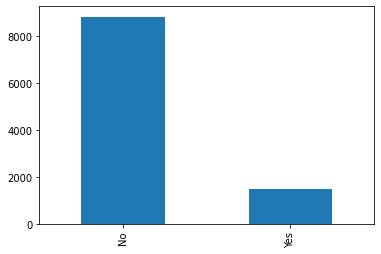

In [72]:
data['Response'].value_counts().plot(kind='bar')

In [47]:
data['Response'].value_counts()

No     8813
Yes    1466
Name: Response, dtype: int64

## 4. Show a plot of the response rate by the sales channel.


In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) 
import warnings
warnings.filterwarnings('ignore') 


data

,Unnamed: 0,Customer ID,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,Employment Status,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,Married,253,NaN,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


<AxesSubplot:xlabel='sales_channel'>

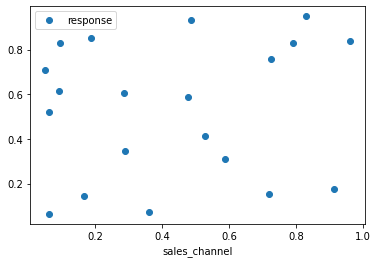

In [79]:
data.plot(x='sales_channel', y='response', style='o')

## 5. Show a plot of the response rate by the total claim amount.


In [83]:
data

,sales_channel,response
0,0.960368,0.836512
1,0.530068,0.412103
2,0.587988,0.310750
3,0.719778,0.153003
4,0.052010,0.709324
5,0.829088,0.949109
6,0.288536,0.345596
7,0.913699,0.175878
8,0.095616,0.831013
9,0.792578,0.831698


In [82]:
data.plot(x='claim_amountl', y='response', style='o')

KeyError: 'claim_amountl'

## 6. Show a plot of the response rate by income.

In [57]:
data.plot(x='income', y='response', style='o')

AttributeError: module 'matplotlib.pyplot' has no attribute 'Scatter'